In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(r'C:\Users\kpaps\Desktop\machine_learning_practice\channel\House_price_prediction - Regression\archive\data.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
data.shape

(4600, 18)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
data.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

<Axes: >

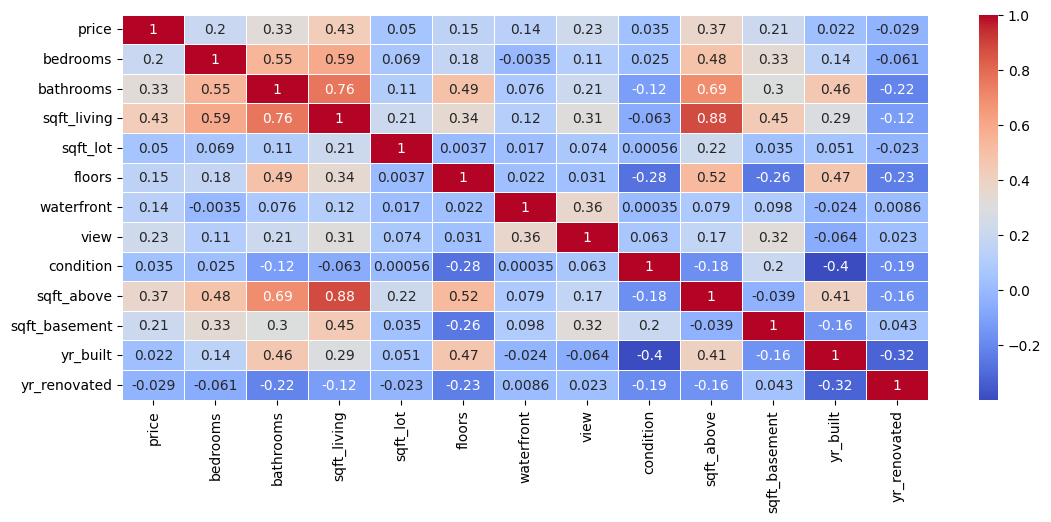

In [12]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(13,5))
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.5)

In [13]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [14]:
col_to_remove = ['date','yr_renovated','street','city','statezip','country']
data = data.drop(columns=col_to_remove)

In [15]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976


In [17]:
import scipy.stats as ststs
z_scores = ststs.zscore(data)
threshold = 3
print('Size before removing outliers: ',data.shape)
outliers_df = data[(z_scores>threshold).any(axis=1)]
data = data[(z_scores <= threshold).all(axis=1)]
print('Size after removing outliers: ',data.shape)

Size before removing outliers:  (4600, 12)
Size after removing outliers:  (4244, 12)


In [18]:
outliers_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921
56,491500.0,4.0,1.75,2190,125452,1.0,0,2,3,2190,0,1968
100,736500.0,4.0,2.50,3180,21904,2.0,0,3,3,3180,0,2000
107,1090000.0,4.0,2.50,4340,141570,2.5,0,0,3,4340,0,1992
118,1030000.0,5.0,2.75,3190,16920,1.0,0,3,3,1690,1500,1976


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data_scaled = pd.DataFrame(scaler.transform(data),columns=data.columns)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [25]:
X = data.drop('price',axis=1)
Y = data['price']

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [26]:
models = [
    ('KNeighborsRegressor: ',KNeighborsRegressor()),
    ('LinearRegression: ',LinearRegression()),
    ('DecisionTreeRegressor: ',DecisionTreeRegressor()),
    ('RandomForestRegressor: ',RandomForestRegressor())
]

In [27]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [30]:
for name,model in models:
    print(name)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print('mean_squared_error: ',mean_squared_error(y_test,y_pred))
    print('r2_score: ',r2_score(y_test,y_pred))
    print('mean_absolute_error: ',mean_absolute_error(y_test,y_pred))
    print('\n')

KNeighborsRegressor: 
mean_squared_error:  54270710864.73361
r2_score:  0.2723497581494757
mean_absolute_error:  155957.7490738805


LinearRegression: 
mean_squared_error:  41194072741.05875
r2_score:  0.4476785633497594
mean_absolute_error:  139590.95600748554


DecisionTreeRegressor: 
mean_squared_error:  75290462453.56595
r2_score:  -0.009478636642951122
mean_absolute_error:  186700.74974330253


RandomForestRegressor: 
mean_squared_error:  44189399879.1516
r2_score:  0.407517849002621
mean_absolute_error:  142022.68168810225


